# Introduction
Delfi Kusuma Wardhani

H8 FTDS - 002

# Dataset Description

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Objective
- We want to find the insight from the features especially those which have not been transformed with PCA, 'Time' and 'Amount' so we could learn more information from the dataset
- In the dataset there's already a feature 'Class' that shows whether the transaction is a fraud or not. But, since the value in this feature is highly imbalance, we will have another approaches to detect the anomaly datas (fraud). Because we wouldn't want to have the fraud transaction is detected as not a fraud (false positive)
- We are going to use Gaussian Mixture Model to work on the anomaly detection

# Import Library

In [242]:
# Common import
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Model
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# Data Loading

In [243]:
data = pd.read_csv('creditcard.csv')
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [245]:
df.shape

(284807, 31)

The dataset contains 31 columns and 284807 rows of datas

# Data Cleaning

In [246]:
# Show the sum of missing value and duplicated data
print('Missing value :','\n', df.isnull().sum())
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicated data :  1081


There's no missing value in the dataset, but there are 1081 rows of duplicated data. So we're gonna erase the duplicated data.

In [247]:
# Delete duplicated data
df = df.drop_duplicates()

In [248]:
# Show updated sum of duplicated data
print('Duplicated data : ', df.duplicated().sum())

Duplicated data :  0


In [249]:
# Show description of numerical data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


- The PCA features seem to be ordered by standard deviation
- Values are centered around zero and scaled within one order of magnitude

# Exploratory Data Analysis

First, let's take a look at the percentage of data that detected as fraud and as a normal transaction (no fraud)

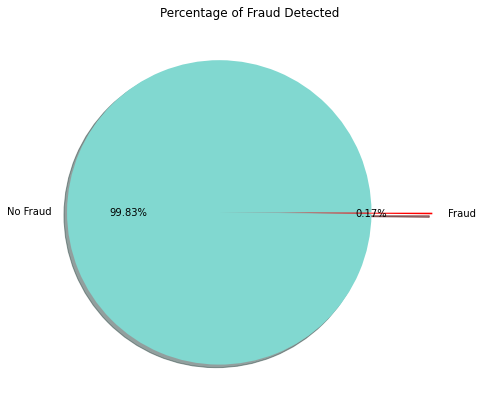

In [250]:
colors = ["#81D8D0", "#FF0000"]
labels = ['No Fraud', 'Fraud']
explode=[0.2,0.2]

plt.figure(figsize=(10,7))
plt.title('Percentage of Fraud Detected')
plt.pie(df['Class'].value_counts(), autopct="%.2f%%", colors=colors, explode=explode, shadow=True, labels=labels)
plt.show()

The dataset is highly imbalance, between fraud data and normal data. Now let's take a look at the data distribution of the features.

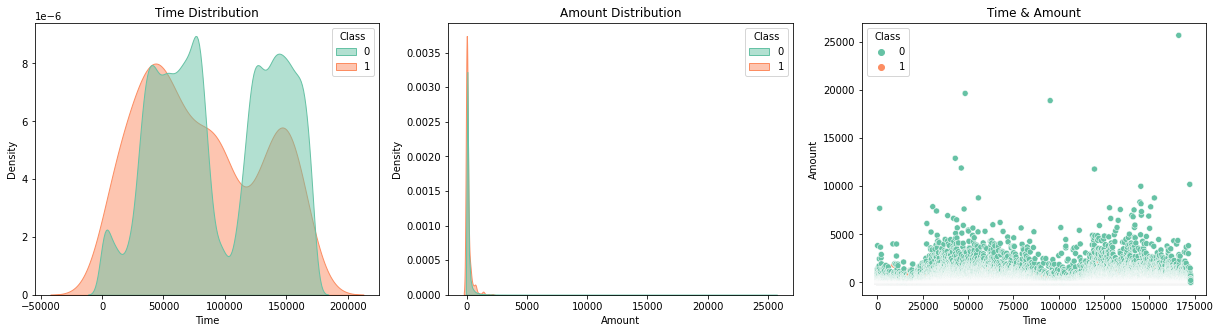

In [251]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.kdeplot(data=df, x="Time", hue="Class", fill=True, common_norm=False, palette="Set2", alpha=.5)
plt.title('Time Distribution')
plt.subplot(1,3,2)
sns.kdeplot(data=df, x="Amount", hue="Class", fill=True, common_norm=False, palette="Set2", alpha=.5)
plt.title('Amount Distribution')
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='Set2')
plt.title('Time & Amount')
plt.show()

Since we cannot interpret any information background from other features, we will focus on these 2 features ('Time' and 'Amount').
- There is quite significant difference of Time distribution between fraud and normal data, though the fraud data has seem more like normal distribution data
- From the 3 graphs above, we can see the the distribution data in 'Amount' is highly skewed to the right, both the normal and fraud data. 
- For the scatterplot chart, since the fraud and normal data is highly imbalanced, we cannot even see the plotted of fraud data.

Now, we'll separated the fraud data and normal(no fraud) data to see clearly the distinctive characteristic of each data


In [252]:
df_normal = df[df['Class']==0]
df_fraud = df[df['Class']==1]

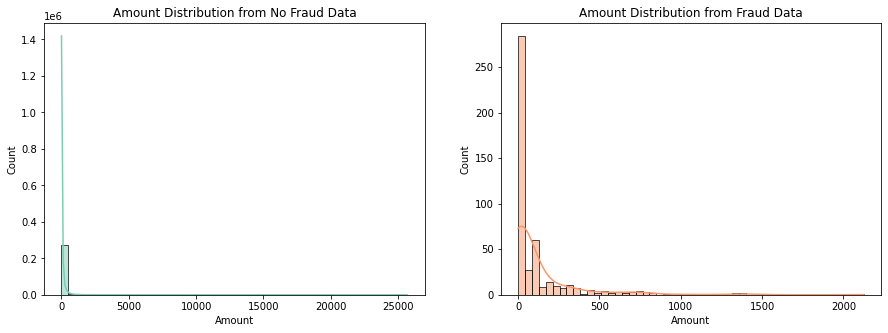

In [253]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df_normal, x='Amount', kde=True, color='#7BCCB5', bins=50)
plt.title('Amount Distribution from No Fraud Data')
plt.subplot(1,2,2)
sns.histplot(data=df_fraud, x='Amount', kde=True, color='#F9966B', bins=50)
plt.title('Amount Distribution from Fraud Data')
plt.show()

- The vast majority of withdrawals are in the sub 100usd range
- The median is lower but the mean is higher for the fraudulent cases. This suggests there are some high value oriented criminals and some that focus on withdrawals "below the radar" to avoid detection

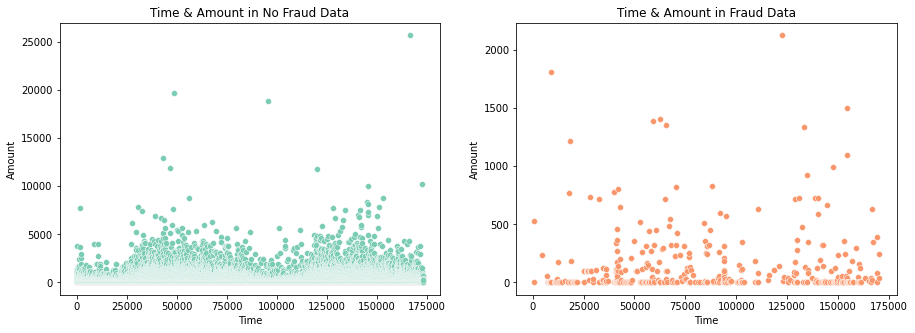

In [254]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_normal, x='Time', y='Amount', color='#7BCCB5')
plt.title('Time & Amount in No Fraud Data')

plt.subplot(1,2,2)
sns.scatterplot(data=df_fraud, x='Time', y='Amount', color='#F9966B')
plt.title('Time & Amount in Fraud Data')
plt.show()

From what we could see, the fraud happens seem mostly in irregular or uncertain time and amount. Although, there is also the unlikely amount of withdrawals have been done in normal data. However, it would be better if those unlikely data (unsual amount of withdrawal) is detected as a fraud transaction. Even so, the credit card company could just reach the customer to confirm whether they just recently made a big purchase or not. It would be more dangerous if the fraud transaction is detected as a normal transaction.

Now, we will try to rebuild the model in detecting anomaly datas to classify them as fraud. 

# Data Preprocessing

## Feature Selection with Random Forest-Feature Importance
First, we will use the importance feature from Random Forest Classifier to select the only matter features that affect in our model training

In [255]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
# WARNING!! LONG COMPUTATION TIME (estimated running time: 5mins)
# Menggunakan library dari Random Classifier untuk memperoleh importance feature
forest = RandomForestClassifier(random_state=42).fit(X,y)

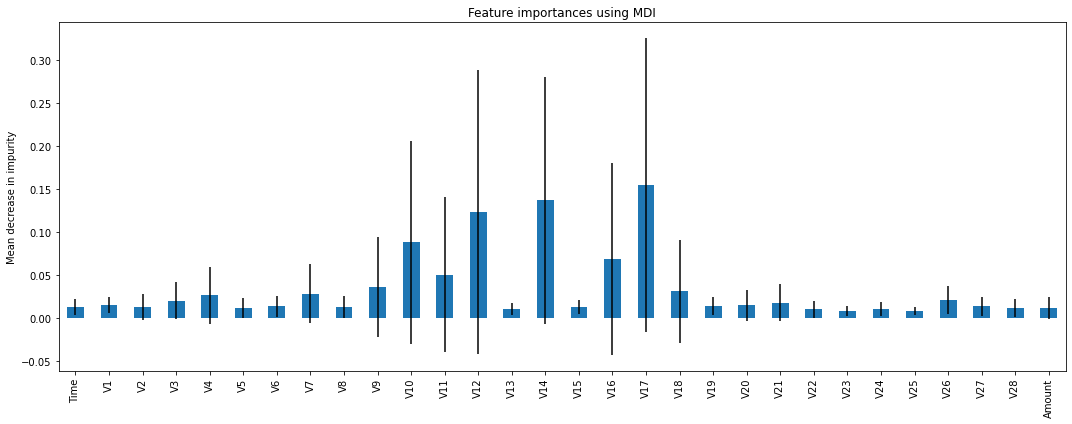

In [ ]:
feature_names = X.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Now, we will only select V12, V14, and V17 to be included in our training model

In [257]:
df_normal.shape

(283253, 31)

In [258]:
df_fraud.shape

(473, 31)

First, we will only take some of the normal data (as much as the fraud data is) as our data train

In [259]:
df_fraud = df[df['Class']==1]
df_normal = df[df['Class']==0][:473]

In [260]:
# Selecting features based on the features importance
df_normal=df_normal[['V12','V14', 'V17','Class']]   
df_fraud=df_fraud[['V12','V14', 'V17', 'Class']]

### Split Data

In [261]:
# Split the normal data
X_train, X_test, y_train, y_test = train_test_split(df_normal.drop(['Class'],axis=1), 
                                                    df_normal['Class'] , test_size=0.2, random_state=42)

# Split the fraud data
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_fraud.drop(['Class'],axis=1), 
                                                            df_fraud['Class'] , test_size=0.2, random_state=42)
print("Jumlah data train (normal) : ", len(X_train))
print("Jumlah data test(normal) : ", len(X_test))
print("Jumlah data train (fraud) : ", len(X_train1))
print("Jumlah data test(fraud) : ", len(X_test1))

Jumlah data train (normal) :  378
Jumlah data test(normal) :  95
Jumlah data train (fraud) :  378
Jumlah data test(fraud) :  95


### Scaling Data

In [262]:
# Scaling Data
scale1 = StandardScaler()
X_train = scale1.fit_transform(X_train)
X_test = scale1.transform(X_test)

scale2 = StandardScaler()
X_train1 = scale2.fit_transform(X_train1)
X_test1 = scale2.transform(X_test1)

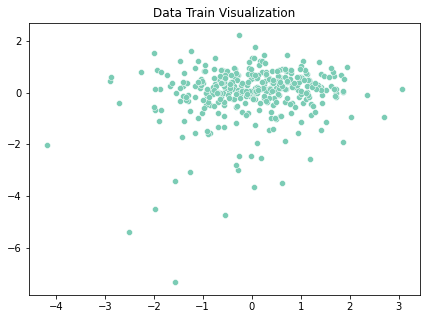

In [263]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7BCCB5')
plt.title('Data Train Visualization')
plt.show()

# Model Definition and Model Training

Here, we would do the anomaly detection with Gaussian Mixture Model. It is one of the clustering model of machine learning that usually used also for detecting outliers. 

In [264]:
# Defining the model
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(covariance_type = 'full', random_state=42)
gm.fit(X_train)

GaussianMixture(random_state=42)

Now, we define  what density threshold we want to use. Some companies usually already have their own threshold in defining the defect products, here, we will use 5% as the threshold to decide whether the data is an outlier(anomaly) or not

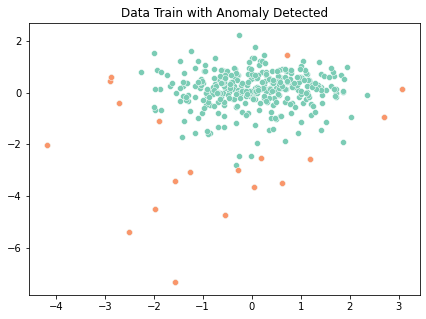

In [265]:
y_train_proba = gm.score_samples(X_train)
density_threshold = np.percentile(y_train_proba, 5)
anomalies = X_train[y_train_proba < density_threshold]

plt.figure(figsize=(7,5))
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7BCCB5')
sns.scatterplot(data=anomalies, x=anomalies[:,0], y=anomalies[:,1], color='#F9966B')
plt.title('Data Train with Anomaly Detected')
plt.show()

The graph above is visualization of the result in separating the data based on the density threshold.

# Model Evaluation

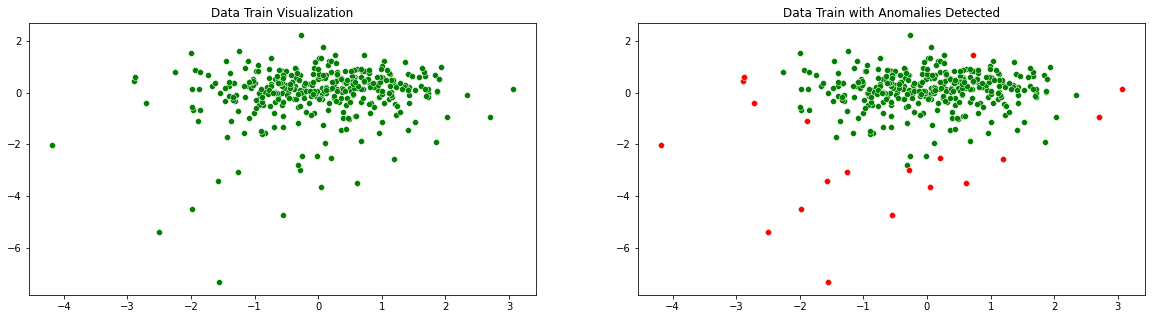

In [266]:
# Visualize the Train Result
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='green')
plt.title('Data Train Visualization')

plt.subplot(1,2,2)
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='green')
sns.scatterplot(data=anomalies, x=anomalies[:,0], y=anomalies[:,1], color='red')
plt.title('Data Train with Anomalies Detected')
plt.show()

Now we have the probable anomalies detected for our data train, let's evaluate on our data test, compare with the original y value (y_test_orig) and look on its AUCPR score

In [267]:
y_test_proba = gm.score_samples(np.vstack([X_test, X_test1]))
density_threshold = np.percentile(y_test_proba, 5)
y_test_proba[y_test_proba>=density_threshold]=0
y_test_proba[y_test_proba<density_threshold]=1
y_test_orig=np.hstack([y_test, y_test1])

print('Classification report')
print(classification_report(y_test_orig, y_test_proba))
print('Test AUCPR = ' + str(average_precision_score(y_test_orig, y_test_proba)))

Classification report
              precision    recall  f1-score   support

           0       0.52      0.98      0.68        95
           1       0.80      0.08      0.15        95

    accuracy                           0.53       190
   macro avg       0.66      0.53      0.41       190
weighted avg       0.66      0.53      0.41       190

Test AUCPR = 0.5252631578947369


We have 52% for AUCPR (Area Under the Precision-Recall Curve) score. It is not quite a good score. However, we have the 80% precision score on fraud data. This is good because we want our model to focus on detecting the false positive. We want to have the false positive score as small as possible. So we won't detecting the fraud as a normal transaction

# Model Inference

In [268]:
dummy = df.sample(n=10, random_state=42)
dummy.drop(['Class'], axis=1, inplace=True)
dummy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82
42637,41182.0,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08
882,666.0,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58
263275,160870.0,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84
17269,28583.0,-0.355559,1.152167,1.180383,0.871709,-0.110167,-0.555447,1.168808,-0.304429,-0.742218,...,0.037388,0.178682,0.579650,-0.131982,0.427097,-0.233496,-0.349738,0.073285,0.145506,76.50
40536,40280.0,-2.875425,-2.908256,2.763027,5.470226,2.752348,-0.942684,-1.801120,-0.314517,-0.438205,...,-0.337012,-0.039486,0.956967,-0.399411,0.630981,-1.312129,0.183929,-0.247995,0.015726,83.00
275379,166502.0,2.035383,0.095966,-1.809208,0.236213,0.639933,-0.375277,0.112440,-0.092928,0.200144,...,-0.093915,-0.322737,-0.862696,0.278418,0.195904,-0.240188,0.170380,-0.066343,-0.041267,10.99
146750,87862.0,-1.974774,1.757830,-0.198483,-2.630909,0.010096,-1.656418,0.859478,0.227337,0.889918,...,0.195246,-0.366320,-0.923972,0.019877,-0.058493,0.113760,0.386570,0.395970,0.333760,1.00
138011,82444.0,-0.414525,0.548519,-0.101307,-1.098160,3.016542,3.199704,0.416023,0.716071,-0.279604,...,0.209044,-0.226166,-0.638127,-0.090751,0.945511,0.176846,-0.728540,0.118644,-0.118224,10.84


In [269]:
dum_prep = dummy[['V12','V14','V17']]
dum_prep = scale1.transform(dum_prep)

In [270]:
dum_pred = gm.score_samples(dum_prep)
density_threshold = np.percentile(dum_pred, 5)

dum_pred[dum_pred>=density_threshold]=0
dum_pred[dum_pred<density_threshold]=1

In [271]:
dummy['result'] = dum_pred
dummy['result'].astype('int32')

104697    0
134356    0
42637     0
882       0
263275    1
17269     0
40536     0
275379    0
146750    0
138011    0
Name: result, dtype: int32

From 10 dummy datas, 1 is detected as fraud

# Conclusion

- The dataset is highly imbalanced, so we decided to separate them based on their 'Class' and take the same proportion of normal data and fraud data. 
- We select the feature using the feature importance from Random Forest model
- We train the data with Gaussian Mixture Model without assigning the number of the cluster (n_component), then we add the threshold (5% density) to detect whether the data is an outlier or not. So the data with density under 5% will be selected as anomaly data, or in this case, as a fraud
- Rather than having cluster numbers as the target result, we had the anomalies data, then we plot to our dataset.
- We had 52% for the AUCPR Score, 80% precision score on fraud, and 52% precision score on no-fraud. For further research, another model of anomaly detection could be implemented to see whether we will get the higher score in these metrics.